In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [3]:
df_train = pd.read_csv('defective_waterpoint_train.csv')
df_test = pd.read_csv('defective_waterpoint_test.csv')

In [4]:
print(df_train.shape)
df_train.dtypes

(50000, 41)


new_ids                    int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [5]:
df_train.head(10)

new_ids  amount_tsh date_recorded                  funder  gps_height  \
0    22379      5000.0    2013-02-05  Government Of Tanzania        1517   
1    37562       200.0    2013-01-17              Msf/tacare        1080   
2    34163         0.0    2013-01-03  Government Of Tanzania        1200   
3     4184         0.0    2013-02-02                   Rwssp           0   
4    57386         0.0    2013-03-04  Government Of Tanzania        1470   
5    12533         0.0    2011-07-18                       H           0   
6    16471         0.0    2012-10-29                  Hesawa        1225   
7    42186      1000.0    2011-11-03                      Rc        2242   
8    20043         0.0    2012-10-09              World Bank           0   
9    29471         0.0    2011-03-15               Rc Church        2165   

    installer  longitude  latitude           wpt_name  num_private    ...     \
0         DWE  29.833534 -4.385917         Lugaragara            0    ...      
1  MSF/TACARE  29.681301 -4.705539            Mnyonge            0    ...      
2         RWE  36.904968 -3.369797            Unambwe            0    ...      
3         DWE  32.540112 -3.750279            Tumaini            0    ...      
4         RWE  37.300442 -3.218826  Kwa Kirombo Msele            0    ...      
5           H  33.077723 -2.388978         Kwa Halifa            0    ...      
6      Hesawa  34.161034 -1.374016    Shule Ya Msingi            0    ...      
7          RC  34.346391 -9.279560   Kwa Faustin Romu            0    ...      
8         PET  33.915819 -4.245252          Kwa Chale            0    ...      
9   RC CHURCH  34.556194 -9.324031          Kwa Mgaya            0    ...      

  water_quality quality_group      quantity  quantity_group        source  \
0          soft          good        enough          enough  shallow well   
1          soft          good        enough          enough         river   
2          soft          good      seasonal        seasonal         river   
3         milky         milky        enough          enough  shallow well   
4          soft          good  insufficient    insufficient        spring   
5         salty         salty  insufficient    insufficient  shallow well   
6         salty         salty        enough          enough   machine dbh   
7          soft          good        enough          enough        spring   
8          soft          good        enough          enough           dam   
9          soft          good        enough          enough        spring   

    source_type source_class              waterpoint_type  \
0  shallow well  groundwater                    hand pump   
1    river/lake      surface           communal standpipe   
2    river/lake      surface           communal standpipe   
3  shallow well  groundwater                    hand pump   
4        spring  groundwater                        other   
5  shallow well  groundwater                    hand pump   
6      borehole  groundwater  communal standpipe multiple   
7        spring  groundwater           communal standpipe   
8           dam      surface  communal standpipe multiple   
9        spring  groundwater           communal standpipe   

  waterpoint_type_group defective  
0             hand pump        no  
1    communal standpipe        no  
2    communal standpipe        no  
3             hand pump        no  
4                 other       yes  
5             hand pump        no  
6    communal standpipe        no  
7    communal standpipe        no  
8    communal standpipe       yes  
9    communal standpipe        no  

[10 rows x 41 columns]

In [6]:
df_train.describe()

new_ids     amount_tsh    gps_height     longitude      latitude  \
count  50000.000000   50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   29660.101860     322.252597    669.174480     34.309327 -5.751281e+00   
std    17140.119702    3154.800568    695.961493      6.112745  2.926610e+00   
min        1.000000       0.000000    -90.000000      0.000000 -1.158630e+01   
25%    14875.750000       0.000000      0.000000     33.179932 -8.569143e+00   
50%    29601.500000       0.000000    364.000000     34.958894 -5.099661e+00   
75%    44507.250000      20.000000   1323.000000     37.208688 -3.334350e+00   
max    59398.000000  350000.000000   2628.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  50000.000000  50000.000000   50000.000000  50000.000000   
mean       0.479900     15.283000       5.696960    179.459920   
std       12.407444     17.680873       9.743879    457.443654   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    210.000000   
max     1776.000000     99.000000      80.000000  11463.000000   

       construction_year  
count       50000.000000  
mean         1308.504300  
std           949.167878  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

no     0.58548
yes    0.41452
Name: defective, dtype: float64


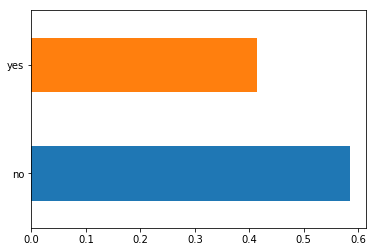

In [7]:
class_prop = df_train['defective'].value_counts() / df_train.shape[0]
print(class_prop)

class_prop.plot.barh()

In [8]:
df_train.isna().sum()

new_ids                      0
amount_tsh                   0
date_recorded                0
funder                    2924
gps_height                   0
installer                 2942
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 337
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2880
recorded_by                  0
scheme_management         3312
scheme_name              23759
permit                    2521
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
print('Numeric columns: ',df_train.select_dtypes(include = np.number).columns)
print('categorical columns: ', df_train.select_dtypes(include=np.object).columns)

Numeric columns:  Index(['new_ids', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')
categorical columns:  Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'defective'],
      dtype='object')


In [10]:
## For missing value visualization
import missingno as msno

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

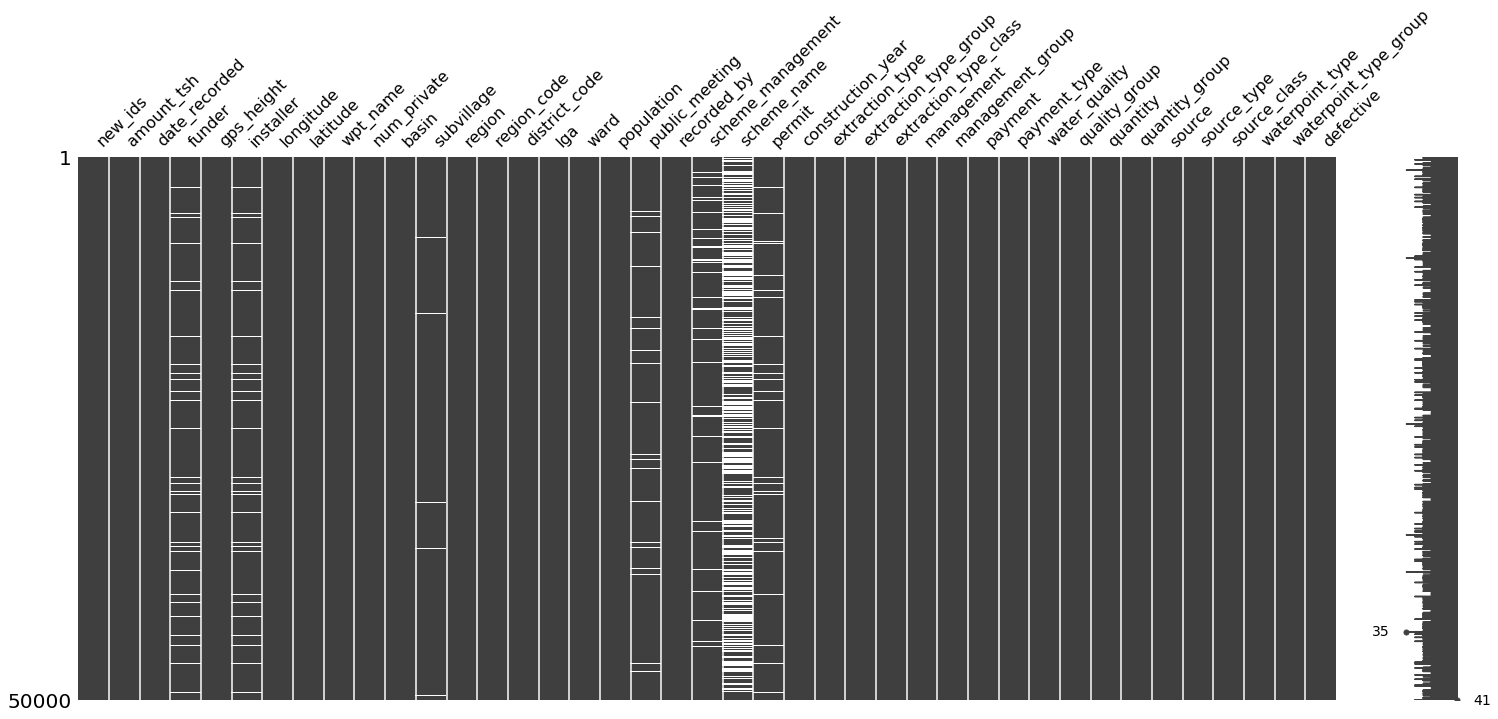

In [11]:
msno.matrix(df_train)

Missing values Heatmap:
The missingno correlation heatmap measures nullity correlation:how strongly the presence or absence of one variable affects the presence of another:

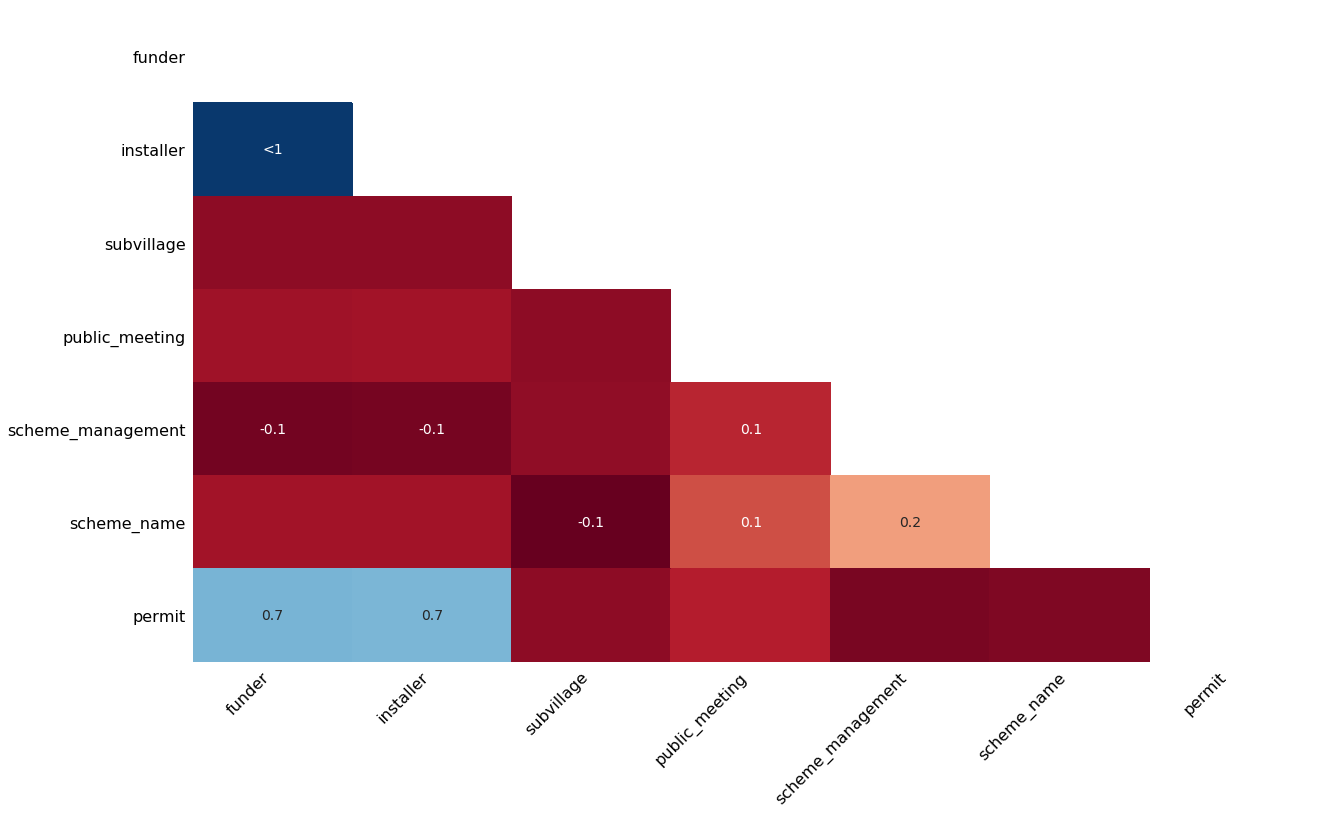

In [12]:
msno.heatmap(df_train)

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or 
not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between installer and funder is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.

Dendogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

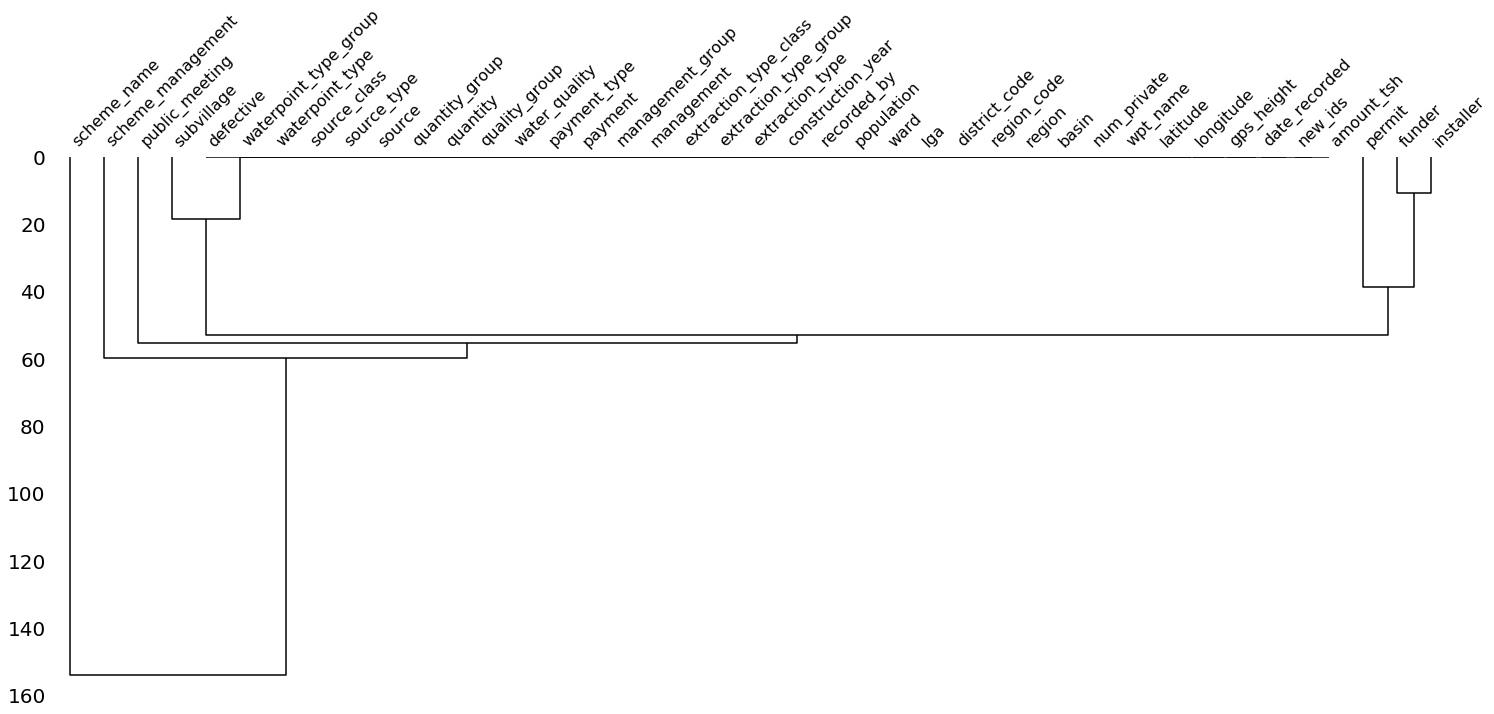

In [13]:
msno.dendrogram(df_train)

In [14]:
df_train.skew(), df_train.kurtosis()

(new_ids               0.004442
 amount_tsh           57.428855
 gps_height            0.468964
 longitude            -4.452637
 latitude             -0.152603
 num_private          96.927415
 region_code           3.156567
 district_code         3.946774
 population            8.764850
 public_meeting       -2.882621
 permit               -0.827256
 construction_year    -0.653001
 dtype: float64, new_ids                 -1.198564
 amount_tsh            4705.431530
 gps_height              -1.290675
 longitude               22.472959
 latitude                -1.081052
 num_private          12069.683768
 region_code             10.149619
 district_code           15.988857
 population             115.858877
 public_meeting           6.309770
 permit                  -1.315703
 construction_year       -1.573158
 dtype: float64)

Univariate Analysis

In [15]:
numeric_col = df_train.select_dtypes(include=np.number).columns
categorical_col = df_train.select_dtypes(include=np.object).columns

In [16]:
numeric_col

Index(['new_ids', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD3AE5E208>,
      dtype=object)

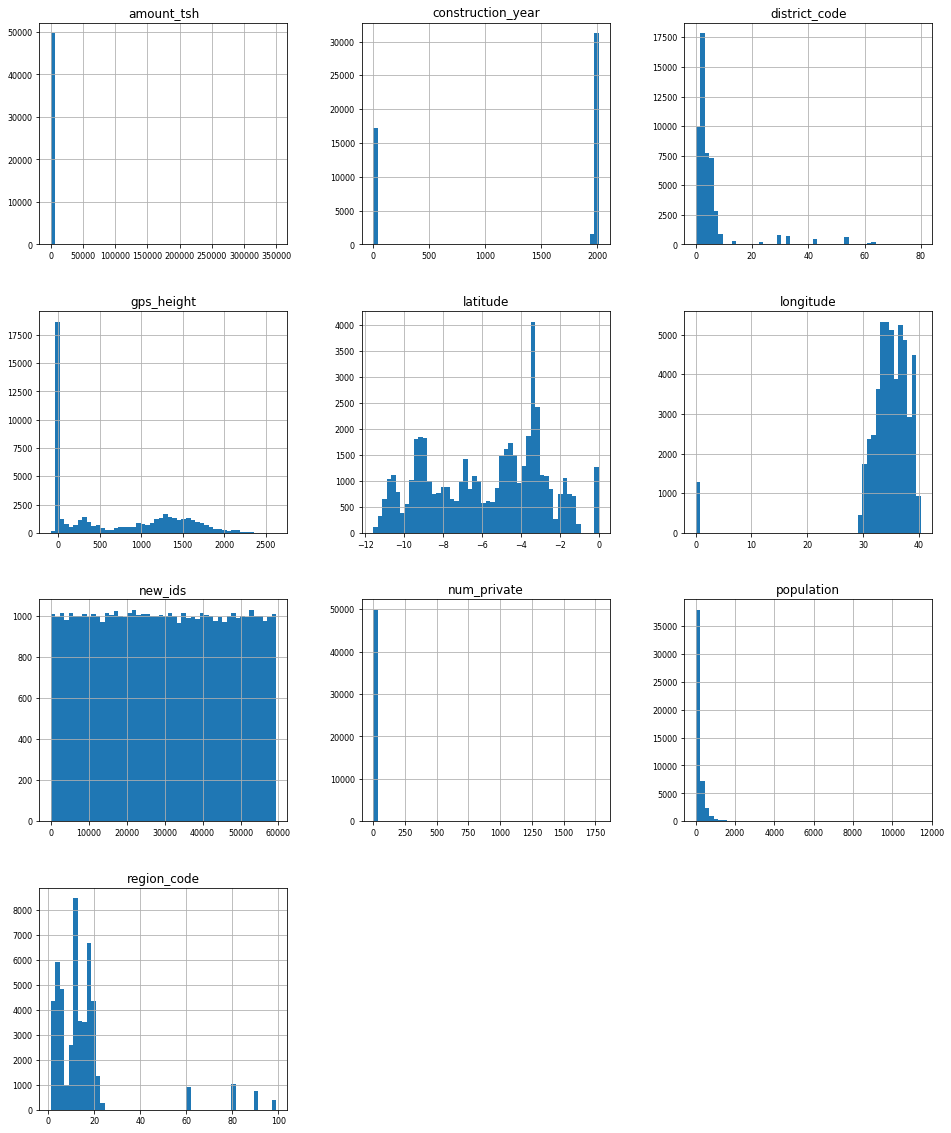

In [17]:
# numeric_col.drop('new_ids')
numeric_col_new = ['amount_tsh', 'gps_height', 'longitude', 'latitude',
                   'num_private', 'population']
df_train[numeric_col].hist(figsize = (16,20), bins = 50, xlabelsize = 8, ylabelsize = 8)

In [18]:
df_train[numeric_col_new].describe()

amount_tsh    gps_height     longitude      latitude   num_private  \
count   50000.000000  50000.000000  50000.000000  5.000000e+04  50000.000000   
mean      322.252597    669.174480     34.309327 -5.751281e+00      0.479900   
std      3154.800568    695.961493      6.112745  2.926610e+00     12.407444   
min         0.000000    -90.000000      0.000000 -1.158630e+01      0.000000   
25%         0.000000      0.000000     33.179932 -8.569143e+00      0.000000   
50%         0.000000    364.000000     34.958894 -5.099661e+00      0.000000   
75%        20.000000   1323.000000     37.208688 -3.334350e+00      0.000000   
max    350000.000000   2628.000000     40.345193 -2.000000e-08   1776.000000   

         population  
count  50000.000000  
mean     179.459920  
std      457.443654  
min        0.000000  
25%        0.000000  
50%       25.000000  
75%      210.000000  
max    11463.000000

Heatmap for numeric columns

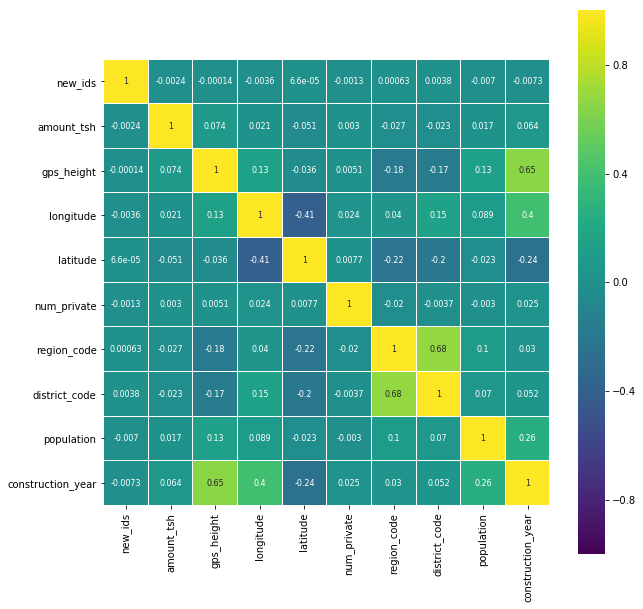

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train[numeric_col].corr(),
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

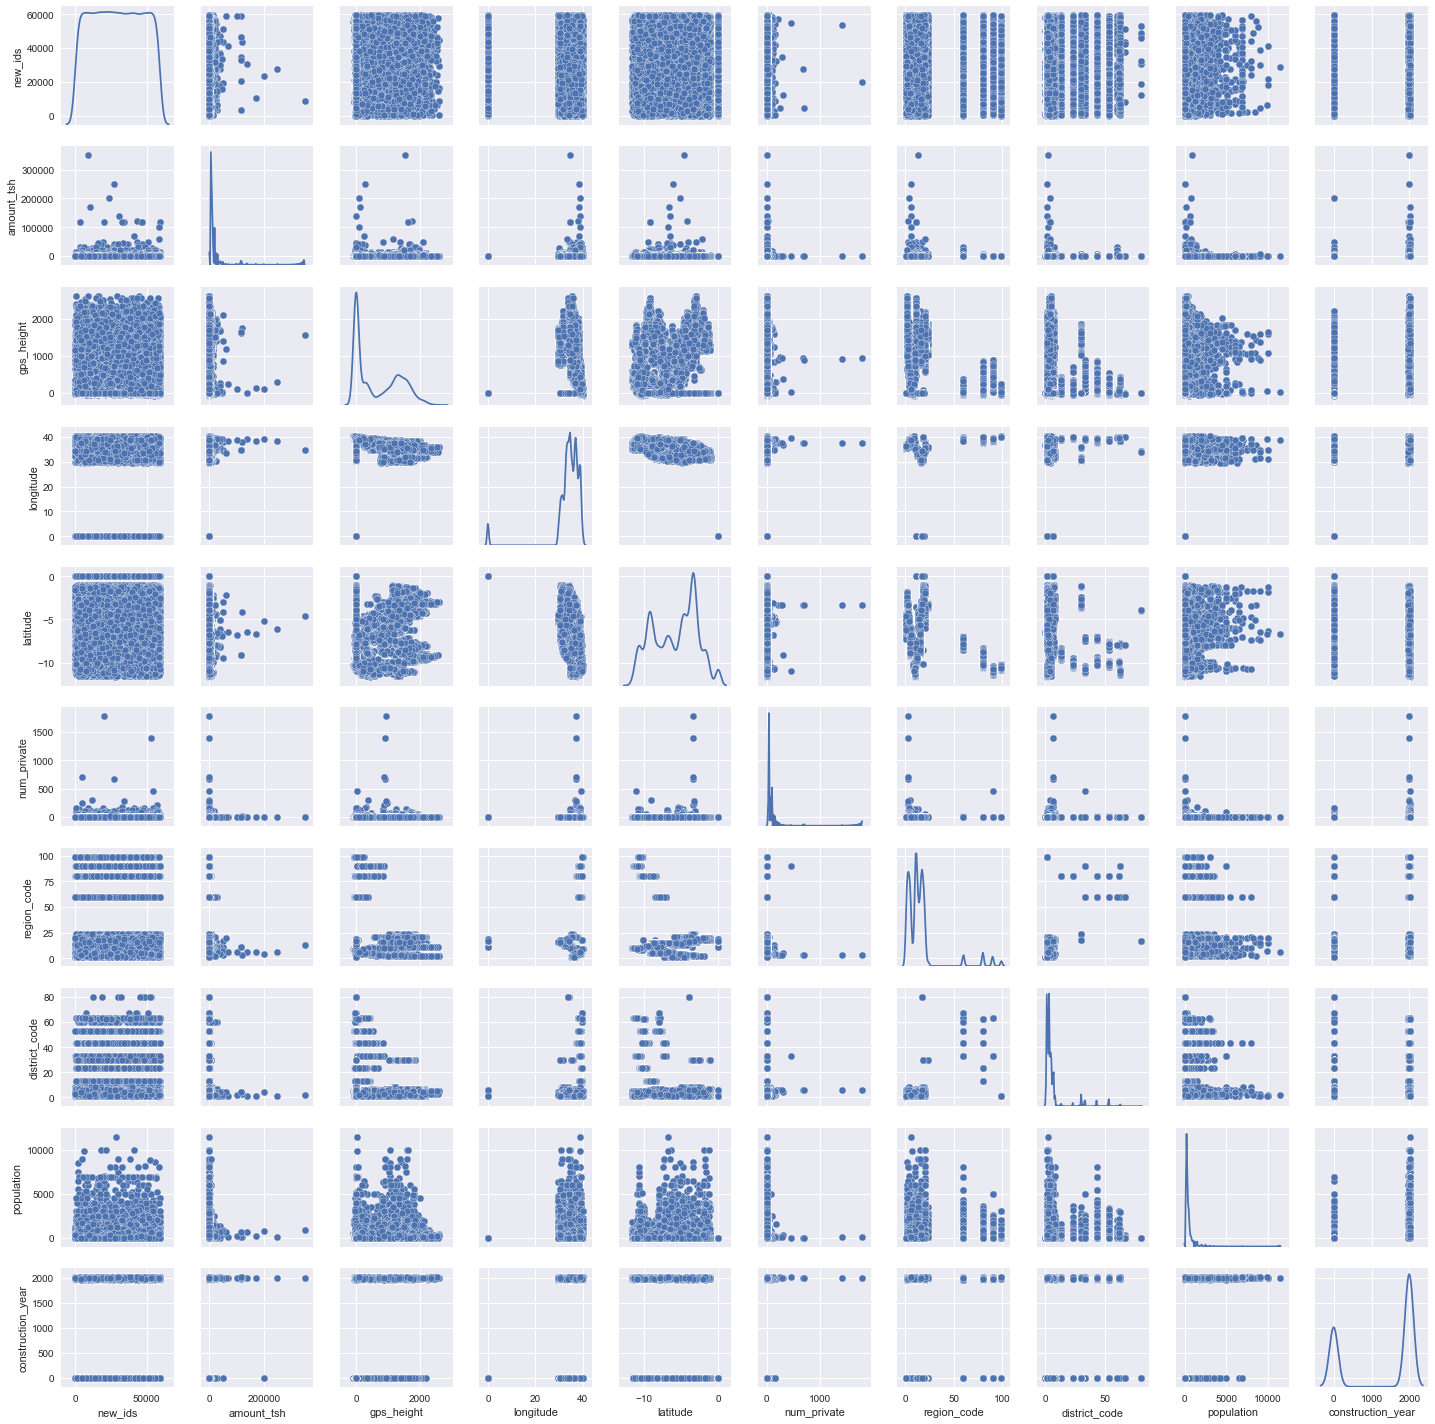

In [20]:
sns.set()
sns.pairplot(df_train[numeric_col], size = 2, kind='scatter', diag_kind='kde')
plt.show()

In [207]:
df_train['region_code'].value_counts()

11    4675
17    3964
12    3792
3     3693
5     3395
18    2728
19    2597
2     2562
10    2244
4     2230
16    1998
1     1811
13    1788
14    1787
20    1747
15    1507
6     1446
21    1349
80    1043
60     919
90     742
7      731
99     383
9      335
24     286
8      248
Name: region_code, dtype: int64

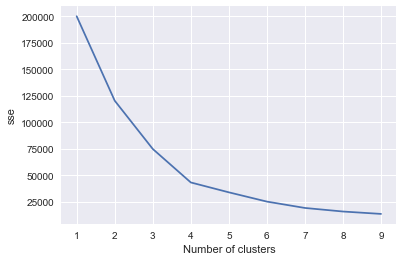

In [21]:
## Treating latitude, longitude, region code & district code

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clustering_data_train = df_train[['longitude', 'latitude', 'district_code', 'region_code']]
clustering_data_test = df_test[['longitude', 'latitude', 'district_code', 'region_code']]

scalar = StandardScaler()
scalar.fit(clustering_data_train)

clustering_data_train = scalar.transform(clustering_data_train)
clustering_data_test = scalar.transform(clustering_data_test)


# clustering_data = scalar.fit_transform(clustering_data)

clustering_data_train = pd.DataFrame(clustering_data_train,
                                     columns = ['longitude', 'latitude', 'district_code', 'region_code'])

clustering_data_test = pd.DataFrame(clustering_data_test,
                                    columns = ['longitude', 'latitude', 'district_code', 'region_code'])

# clustering_data_train.describe(), clustering_data_test.describe()

sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters= k, max_iter= 1000, random_state= 0)
    kmeans.fit(clustering_data_train)
    
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()


In [22]:
## Creating 4 clusters

kmeans_4 = KMeans(n_clusters= 4, max_iter= 1000, random_state=0)
kmeans_4.fit(clustering_data_train)

clustering_data_train['cluster'] = kmeans_4.labels_
print(clustering_data_train['cluster'].value_counts())

## predicting cluster variable for test dataset

clustering_data_test['cluster'] = pd.DataFrame(kmeans_4.predict(clustering_data_test),
                                               columns = ['cluster'])
print(clustering_data_test['cluster'].value_counts())

## Adding cluster variable to train & test dataset
df_train['cluster'] = clustering_data_train['cluster']
df_test['cluster'] = clustering_data_test['cluster']

0    25962
2    19663
1     3096
3     1279
Name: cluster, dtype: int64
0    2634
2    1986
1     316
3     147
Name: cluster, dtype: int64


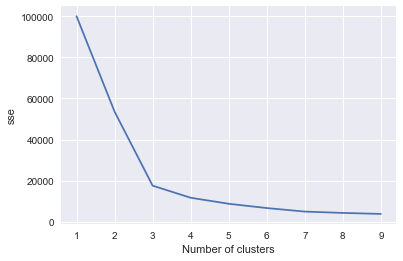

In [23]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clustering_data_train = df_train[['longitude', 'latitude']]#, 'district_code', 'region_code']]
clustering_data_test = df_test[['longitude', 'latitude']]#, 'district_code', 'region_code']]

scalar = StandardScaler()
scalar.fit(clustering_data_train)

clustering_data_train = scalar.transform(clustering_data_train)
clustering_data_test = scalar.transform(clustering_data_test)


# clustering_data = scalar.fit_transform(clustering_data)

clustering_data_train = pd.DataFrame(clustering_data_train,
                                     columns = ['longitude', 'latitude'])#, 'district_code', 'region_code'])

clustering_data_test = pd.DataFrame(clustering_data_test,
                                    columns = ['longitude', 'latitude'])#, 'district_code', 'region_code'])

# clustering_data_train.describe(), clustering_data_test.describe()

sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters= k, max_iter= 1000, random_state= 0)
    kmeans.fit(clustering_data_train)
    
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()


In [24]:
## Creating 3 clusters

kmeans_3 = KMeans(n_clusters= 3, max_iter= 1000, random_state=0)
kmeans_3.fit(clustering_data_train)

clustering_data_train['cluster'] = kmeans_3.labels_
print(clustering_data_train['cluster'].value_counts())

## predicting cluster variable for test dataset

clustering_data_test['cluster'] = pd.DataFrame(kmeans_3.predict(clustering_data_test),
                                               columns = ['cluster'])
print(clustering_data_test['cluster'].value_counts())

## Adding cluster variable to train & test dataset
df_train['cluster_2'] = clustering_data_train['cluster']
df_test['cluster_2'] = clustering_data_test['cluster']

1    26619
2    22102
0     1279
Name: cluster, dtype: int64
1    2694
2    2242
0     147
Name: cluster, dtype: int64


Categorical variables EDA

In [25]:
categorical_col

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'defective'],
      dtype='object')

In [26]:
# len(df_train['date_recorded'].unique())
for i in range(0,len(categorical_col)-1):
    print(categorical_col[i], 'has ', len(df_train[categorical_col[i]].unique()), 'unique values')

date_recorded has  354 unique values
funder has  1761 unique values
installer has  1994 unique values
wpt_name has  32111 unique values
basin has  9 unique values
subvillage has  17594 unique values
region has  21 unique values
lga has  125 unique values
ward has  2087 unique values
public_meeting has  3 unique values
recorded_by has  1 unique values
scheme_management has  13 unique values
scheme_name has  2584 unique values
permit has  3 unique values
extraction_type has  18 unique values
extraction_type_group has  13 unique values
extraction_type_class has  7 unique values
management has  12 unique values
management_group has  5 unique values
payment has  7 unique values
payment_type has  7 unique values
water_quality has  8 unique values
quality_group has  6 unique values
quantity has  5 unique values
quantity_group has  5 unique values
source has  10 unique values
source_type has  7 unique values
source_class has  3 unique values
waterpoint_type has  7 unique values
waterpoint_type

In [167]:
df_train['installer'] = df_train['installer'].fillna('none')
df_test['installer'] = df_test['installer'].fillna('none')
pd.Series(' '.join(df_train['installer'].str.lower()).split(' ')).value_counts()

dwe            14485
none            2942
government      2273
water           1639
hesawa          1228
district        1041
kkkt             979
rwe              976
council          947
commu            944
danida           883
world            808
central          805
0                704
tcrs             627
community        581
vision           565
danid            561
ces              560
gover            441
ya               436
rc               429
department       402
amref            393
tasaf            354
fini             344
wedeco           339
maji             329
dmdd             326
lga              297
               ...  
dwe&               1
potry              1
boma               1
frankfurt          1
vwt                1
hotel              1
rwet/wesa          1
rescue             1
indiv              1
africare           1
misana             1
tassaf/            1
tambalizeni        1
mahambo            1
kilinga            1
deogra             1
safe         

In [171]:
df_train['installer_dwe'] = df_train['installer'].apply(lambda x: 1 if 'dwe' in x.lower().split(' ') else 0)
df_train['installer_government'] = df_train['installer'].apply(lambda x: 1 if 'government' in x.lower().split(' ') else 0)
df_train['installer_none'] = df_train['installer'].apply(lambda x: 1 if 'none' in x.lower().split(' ') else 0)
df_train['installer_district'] = df_train['installer'].apply(lambda x: 1 if 'district' in x.lower().split(' ') else 0)
df_train['installer_council'] = df_train['installer'].apply(lambda x: 1 if 'council' in x.lower().split(' ') else 0)
df_train['installer_hesawa'] = df_train['installer'].apply(lambda x: 1 if 'hesawa' in x.lower().split(' ') else 0)
df_train['installer_water'] = df_train['installer'].apply(lambda x: 1 if 'water' in x.lower().split(' ') else 0)
df_train['installer_commu'] = df_train['installer'].apply(lambda x: 1 if 'commu' in x.lower().split(' ') else 0)
df_train['installer_kkkt'] = df_train['installer'].apply(lambda x: 1 if 'kkkt' in x.lower().split(' ') else 0)

df_test['installer_dwe'] = df_test['installer'].apply(lambda x: 1 if 'dwe' in x.lower().split(' ') else 0)
df_test['installer_government'] = df_test['installer'].apply(lambda x: 1 if 'government' in x.lower().split(' ') else 0)
df_test['installer_none'] = df_test['installer'].apply(lambda x: 1 if 'none' in x.lower().split(' ') else 0)
df_test['installer_district'] = df_test['installer'].apply(lambda x: 1 if 'district' in x.lower().split(' ') else 0)
df_test['installer_council'] = df_test['installer'].apply(lambda x: 1 if 'council' in x.lower().split(' ') else 0)
df_test['installer_hesawa'] = df_test['installer'].apply(lambda x: 1 if 'hesawa' in x.lower().split(' ') else 0)
df_test['installer_water'] = df_test['installer'].apply(lambda x: 1 if 'water' in x.lower().split(' ') else 0)
df_test['installer_commu'] = df_test['installer'].apply(lambda x: 1 if 'commu' in x.lower().split(' ') else 0)
df_test['installer_kkkt'] = df_test['installer'].apply(lambda x: 1 if 'kkkt' in x.lower().split(' ') else 0)


In [175]:
df_train['funder'] = df_train['funder'].fillna('none')
df_test['funder'] = df_test['funder'].fillna('none')
pd.Series(' '.join(df_train['funder'].str.lower()).split(' ')).value_counts()

of             8193
government     7727
tanzania       7674
none           2926
danida         2710
world          2322
water          2263
hesawa         1799
bank           1179
kkkt           1167
rwssp          1147
vision         1026
private         994
council         985
unicef          881
district        829
tasaf           740
individual      725
dhv             714
0               704
germany         677
rc              595
republi         560
norad           553
ministry        534
dwsp            532
tcrs            526
church          509
supply          470
dwe             426
               ... 
mara              1
india             1
shilingi          1
songa             1
saint             1
buluga            1
bhws              1
ma                1
fptc              1
samaras           1
sun-ja            1
england           1
pdi               1
r                 1
msudi             1
seram             1
shirika           1
kanamama          1
counter           1


In [177]:
df_train['funder_government'] = df_train['funder'].apply(lambda x: 1 if 'government' in x.lower().split(' ') else 0)
df_train['funder_tanzania'] = df_train['funder'].apply(lambda x: 1 if 'tanzania' in x.lower().split(' ') else 0)
df_train['funder_none'] = df_train['funder'].apply(lambda x: 1 if 'none' in x.lower().split(' ') else 0)
df_train['funder_private'] = df_train['funder'].apply(lambda x: 1 if 'private' in x.lower().split(' ') else 0)
df_train['funder_hesawa'] = df_train['funder'].apply(lambda x: 1 if 'hesawa' in x.lower().split(' ') else 0)
df_train['funder_bank'] = df_train['funder'].apply(lambda x: 1 if 'bank' in x.lower().split(' ') else 0)
df_train['funder_ministry'] = df_train['funder'].apply(lambda x: 1 if 'ministry' in x.lower().split(' ') else 0)
df_train['funder_vision'] = df_train['funder'].apply(lambda x: 1 if 'vision' in x.lower().split(' ') else 0)
df_train['funder_world'] = df_train['funder'].apply(lambda x: 1 if 'world' in x.lower().split(' ') else 0)
df_train['funder_rwssp'] = df_train['funder'].apply(lambda x: 1 if 'rwssp' in x.lower().split(' ') else 0)
df_train['funder_kkkt'] = df_train['funder'].apply(lambda x: 1 if 'kkkt' in x.lower().split(' ') else 0)

df_test['funder_government'] = df_test['funder'].apply(lambda x: 1 if 'government' in x.lower().split(' ') else 0)
df_test['funder_tanzania'] = df_test['funder'].apply(lambda x: 1 if 'tanzania' in x.lower().split(' ') else 0)
df_test['funder_none'] = df_test['funder'].apply(lambda x: 1 if 'none' in x.lower().split(' ') else 0)
df_test['funder_private'] = df_test['funder'].apply(lambda x: 1 if 'private' in x.lower().split(' ') else 0)
df_test['funder_hesawa'] = df_test['funder'].apply(lambda x: 1 if 'hesawa' in x.lower().split(' ') else 0)
df_test['funder_bank'] = df_test['funder'].apply(lambda x: 1 if 'bank' in x.lower().split(' ') else 0)
df_test['funder_ministry'] = df_test['funder'].apply(lambda x: 1 if 'ministry' in x.lower().split(' ') else 0)
df_test['funder_vision'] = df_test['funder'].apply(lambda x: 1 if 'vision' in x.lower().split(' ') else 0)
df_test['funder_world'] = df_test['funder'].apply(lambda x: 1 if 'world' in x.lower().split(' ') else 0)
df_test['funder_rwssp'] = df_test['funder'].apply(lambda x: 1 if 'rwssp' in x.lower().split(' ') else 0)
df_test['funder_kkkt'] = df_test['funder'].apply(lambda x: 1 if 'kkkt' in x.lower().split(' ') else 0)

 Treating waterpoint name

In [27]:
# df_train['wpt_name'].head(100)
df_train['wpt_name'].unique()
wpt_name = df_train['wpt_name'].str.lower()
# wpt_name[4].split(' ')

# nltk.FreqDist(pd.Series(' '.join(wpt_name).split(' ')))
pd.Series(' '.join(wpt_name).split(' ')).value_counts().head(10)

kwa         18063
none         3145
mzee         2766
shuleni      1774
ya           1214
shule        1110
school        923
primary       846
zahanati      809
msingi        693
dtype: int64

In [28]:
df_train['wpt_name_kwa'] = df_train['wpt_name'].apply(lambda x: True if 'kwa' in x.lower().split(' ') else False)
df_train['wpt_name_none'] = df_train['wpt_name'].apply(lambda x: True if 'none' in x.lower().split(' ') else False)
df_train['wpt_name_mzee'] = df_train['wpt_name'].apply(lambda x: True if 'mzee' in x.lower().split(' ') else False)
df_train['wpt_name_shuleni'] = df_train['wpt_name'].apply(lambda x: True if 'shuleni' in x.lower().split(' ') else False)
df_train['wpt_name_shule'] = df_train['wpt_name'].apply(lambda x: True if 'shule' in x.lower().split(' ') else False)
df_train['wpt_name_school'] = df_train['wpt_name'].apply(lambda x: True if 'school' in x.lower().split(' ') else False)


print(df_train['wpt_name_kwa'].value_counts())

False    31940
True     18060
Name: wpt_name_kwa, dtype: int64
False    46855
True      3145
Name: wpt_name_none, dtype: int64
False    47235
True      2765
Name: wpt_name_mzee, dtype: int64
False    48226
True      1774
Name: wpt_name_shuleni, dtype: int64
False    48890
True      1110
Name: wpt_name_shule, dtype: int64
False    49077
True       923
Name: wpt_name_school, dtype: int64


In [29]:
wpt_name_col = ['wpt_name_kwa', 'wpt_name_none','wpt_name_mzee','wpt_name_shuleni','wpt_name_shule','wpt_name_school' ]

for i in range(0,len(wpt_name_col)-1):
    for j in range(0,len(wpt_name_col)-1):
        if(wpt_name_col[i] == wpt_name_col[j]):
            continue
        else:
            print(pd.crosstab(df_train[wpt_name_col[i]], df_train[wpt_name_col[j]]))

wpt_name_none  False  True 
wpt_name_kwa               
False          28795   3145
True           18060      0
wpt_name_mzee  False  True 
wpt_name_kwa               
False          31754    186
True           15481   2579
wpt_name_shuleni  False  True 
wpt_name_kwa                  
False             30169   1771
True              18057      3
wpt_name_shule  False  True 
wpt_name_kwa                
False           30830   1110
True            18060      0
wpt_name_kwa   False  True 
wpt_name_none              
False          28795  18060
True            3145      0
wpt_name_mzee  False  True 
wpt_name_none              
False          44090   2765
True            3145      0
wpt_name_shuleni  False  True 
wpt_name_none                 
False             45081   1774
True               3145      0
wpt_name_shule  False  True 
wpt_name_none               
False           45745   1110
True             3145      0
wpt_name_kwa   False  True 
wpt_name_mzee              
False          3

In [30]:
## creating new columns in the test data 

df_test['wpt_name_kwa'] = df_test['wpt_name'].apply(lambda x: True if 'kwa' in x.lower().split(' ') else False)
df_test['wpt_name_none'] = df_test['wpt_name'].apply(lambda x: True if 'none' in x.lower().split(' ') else False)
df_test['wpt_name_mzee'] = df_test['wpt_name'].apply(lambda x: True if 'mzee' in x.lower().split(' ') else False)
df_test['wpt_name_shuleni'] = df_test['wpt_name'].apply(lambda x: True if 'shuleni' in x.lower().split(' ') else False)
df_test['wpt_name_shule'] = df_test['wpt_name'].apply(lambda x: True if 'shule' in x.lower().split(' ') else False)
df_test['wpt_name_school'] = df_test['wpt_name'].apply(lambda x: True if 'school' in x.lower().split(' ') else False)

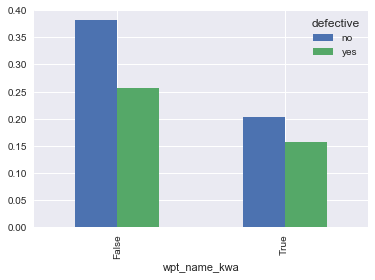

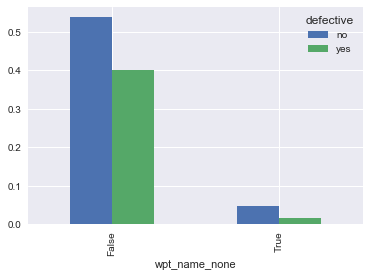

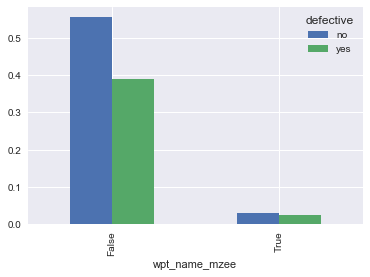

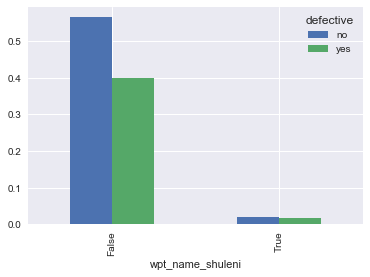

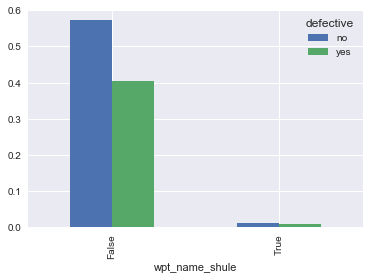

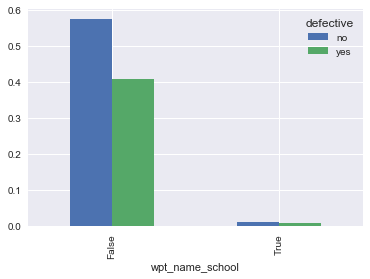

In [31]:
for i in wpt_name_col:
    pd.crosstab(df_train[i], df_train['defective'], normalize= True).plot(kind = 'bar')

Treating geographic location

In [32]:
# df_train['subvillage'].value_counts()
df_train['lga'].value_counts()
pd.Series(' '.join(df_train['lga']).lower().split(' ')).value_counts().head(10)

rural       7862
njombe      2178
urban       1456
arusha      1127
moshi       1093
singida     1010
kilosa       933
bagamoyo     898
mbozi        881
meru         880
dtype: int64

In [33]:
df_train.loc[df_train['lga'] == 'Njombe']['defective'].value_counts()

no     1827
yes     351
Name: defective, dtype: int64

In [34]:
df_train['lga_rural'] = df_train['lga'].apply(lambda x: True if 'rural' in x.lower().split(' ') else False)
df_train['lga_urban'] = df_train['lga'].apply(lambda x: True if 'urban' in x.lower().split(' ') else False)
df_train['lga_njombe'] = df_train['lga'].apply(lambda x: True if 'njombe' in x.lower().split(' ') else False)

df_test['lga_rural'] = df_test['lga'].apply(lambda x: True if 'rural' in x.lower().split(' ') else False)
df_test['lga_urban'] = df_test['lga'].apply(lambda x: True if 'urban' in x.lower().split(' ') else False)
df_test['lga_njombe'] = df_test['lga'].apply(lambda x: True if 'njombe' in x.lower().split(' ') else False)

In [273]:
# df_train['installer_new'] = df_train['installer'].apply(lambda x: 'none' if x == '0' else x)
# df_train['installer_new'] = df_train['installer_new'].str.replace(r'.','')
# df_train['installer_new'].unique()[0:1000]

# df_train = df_train.drop(['installer_new'], axis = 1)
# pd.Series(' '.join(df_train['installer_new']).lower().split(' ')).value_counts()

In [35]:
df_train['scheme_management'].value_counts()
df_train.loc[df_train['scheme_management'] == 'SWC']['defective'].value_counts()

yes    72
no     17
Name: defective, dtype: int64

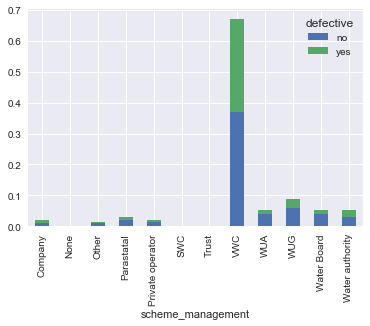

In [36]:
pd.crosstab(df_train['scheme_management'], df_train['defective'], normalize = True).plot(kind = 'bar', stacked = True)

In [37]:
df_train['permit'].value_counts()
df_train['public_meeting'].value_counts()

True     42917
False     4203
Name: public_meeting, dtype: int64

In [38]:
df_train.groupby(['scheme_name', 'scheme_management'])['scheme_management'].count()

scheme_name                  scheme_management
14 Kambarage                 VWC                    6
A                            Parastatal             3
                             Private operator       1
                             VWC                    2
                             WUA                   16
                             Water Board           13
ADP                          Water authority        9
ADP Simbo                    Private operator       9
                             Water authority       14
ADP Simbu                    Private operator       1
ADRA                         VWC                    8
AIC                          VWC                    1
AIC kahunda                  Private operator       1
AMREF                        WUG                    3
AMRSF                        WUG                    1
AUWASA Pipe scheme           Private operator       1
                             Water authority        2
AUWASA pipe scheme           Water 

In [225]:
# scheme = {}
# scheme_name = df_train['scheme_name'].unique()

# for i in scheme_name:
#     scheme[i] = (df_train.loc[df_train['scheme_name'] == i,'scheme_management'].mode())

# scheme_table = pd.DataFrame(scheme).transpose()
# scheme_table['scheme_name'] = scheme_table.index

# scheme_table = scheme_table.drop([1], axis = 1)
# scheme_table.columns = ['scheme_management', 'scheme_name']


In [39]:
%%time

## Imputing scheme management values using scheme name

scheme_values_train = {}

for i in range(0,df_train.shape[0]):            #df_train.shape[0]-1
    if(df_train['scheme_management'].isna()[i]):
        if(df_train['scheme_name'].isna()[i]):
            scheme_values_train[i] = df_train['scheme_management'].mode()
        else:
#             scheme_values_train[i] = scheme_table.loc[scheme_table['scheme_name'] == df_train['scheme_name'][i],
#                                                                  'scheme_management']
            q = df_train['scheme_name'][i]
            scheme_values_train[i] = df_train.loc[df_train['scheme_name'] == q,
                                                                 'scheme_management'].mode()
    else:
        scheme_values_train[i] = df_train['scheme_management'][i]

scheme_management_train = pd.DataFrame(scheme_values_train).transpose()
scheme_management_train.columns = ['scheme_management']

df_train['scheme_management'] = scheme_management_train['scheme_management']
df_train['scheme_management'] = df_train['scheme_management'].fillna(df_train['scheme_management'].mode()[0])

Wall time: 1min 35s


In [40]:
%%time

scheme_values_test = {}

for i in range(0,df_test.shape[0]):            #df_test.shape[0]-1
    if(df_test['scheme_management'].isna()[i]):
        if(df_test['scheme_name'].isna()[i]):
            scheme_values_test[i] = df_test['scheme_management'].mode()
#         else:
#             scheme_values_test[i] = scheme_table.loc[scheme_table['scheme_name'] == df_test['scheme_name'][i],
#                                                                  'scheme_management']
            q = df_test['scheme_name'][i]
            scheme_values_train[i] = df_train.loc[df_train['scheme_name'] == q,
                                                                 'scheme_management'].mode()
    else:
        scheme_values_test[i] = df_test['scheme_management'][i]

scheme_management_test = pd.DataFrame(scheme_values_test).transpose()
scheme_management_test.columns = ['scheme_management']

df_test['scheme_management'] = scheme_management_test['scheme_management']
df_test['scheme_management'] = df_test['scheme_management'].fillna(df_train['scheme_management'].mode()[0])

Wall time: 1.73 s


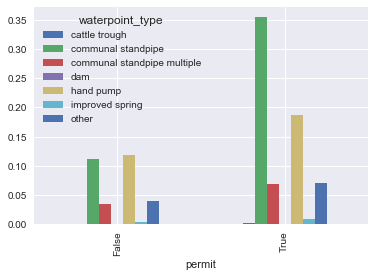

In [41]:
pd.crosstab(df_train['permit'], df_train['waterpoint_type'], normalize= True).plot(kind = 'bar')

In [42]:
df_train.groupby(['funder', 'permit'])['waterpoint_type'].count()
df_train.groupby(['funder', 'public_meeting'])['waterpoint_type'].count()

funder                       public_meeting
0                            False               5
                             True              307
A/co Germany                 False               5
                             True                8
Aar                          True               27
Abas Ka                      True                1
Abasia                       True               35
Abc-ihushi Development Cent  True                1
Abd                          False               2
                             True                3
Abdul                        True                1
Abood                        True                1
Abs                          True                1
Aco/germany                  True               12
Acord                        True                3
Acord Ngo                    True                1
Acra                         True               45
Act Mara                     True                1
Action Aid                   True     

In [172]:
# funder_permit = {}
# funder_name = df_train['funder'].unique()

# for i in funder_name:
#     funder_permit[i] = df_train.loc[df_train['funder'] == i, 'permit'].mode()

# funder_permit_table = pd.DataFrame(funder_permit).transpose()
# funder_permit_table['funder'] = funder_permit_table.index

# funder_permit_table = funder_permit_table.drop([1], axis = 1)
# funder_permit_table.columns = ['permit','funder']

In [174]:
# installer_permit = {}
# installer_name = df_train['installer'].unique()

# for i in installer_name:
#     installer_permit[i] = df_train.loc[df_train['installer'] == i, 'permit'].mode()
    
# installer_permit_table = pd.DataFrame(installer_permit).transpose()
# installer_permit_table['installer'] = installer_permit_table.index

# installer_permit_table = installer_permit_table.drop([1], axis = 1)
# installer_permit_table.columns = ['permit','installer']
# # installer_permit_table

permit                       installer
DWE                              True                             DWE
MSF/TACARE                       True                      MSF/TACARE
RWE                              True                             RWE
H                                True                               H
Hesawa                           True                          Hesawa
RC                               True                              RC
PET                              True                             PET
RC CHURCH                       False                       RC CHURCH
Miziriol                         True                        Miziriol
WU                               True                              WU
World Vision                    False                    World Vision
DANIDA                           True                          DANIDA
Ki                               True                              Ki
WVT                             False                             WVT
WEDECO                           True                          WEDECO
MASWI DRILLING                   True                  MASWI DRILLING
NaN                               NaN                             NaN
Handeni Trunk Main(              True             Handeni Trunk Main(
Villa                           False                           Villa
0                               False                               0
CENTRAL GOVERNMENT               True              CENTRAL GOVERNMENT
MTN                             False                             MTN
DA                               True                              DA
Wizara ya maji                  False                  Wizara ya maji
Community                        True                       Community
JUIN CO                          True                         JUIN CO
Central Government               True              Central Government
Sengerema Water Department       True      Sengerema Water Department
Centr                           False                           Centr
Central government               True              Central government
...                               ...                             ...
WINAM CONSTRUCTION               True              WINAM CONSTRUCTION
Quick win/halmashauri            True           Quick win/halmashauri
CCPK                             True                            CCPK
CHANI                            True                           CHANI
Hasnein Murij                    True                   Hasnein Murij
TCRS/village community           True          TCRS/village community
Kiwanda cha Ngozi                True               Kiwanda cha Ngozi
Seif Ndago                      False                      Seif Ndago
Got                              True                             Got
CEFA/rc church                   True                  CEFA/rc church
Usambala sisters                 True                Usambala sisters
HesaWa                           True                          HesaWa
VITECOS INVEST                   True                  VITECOS INVEST
GURUMETI SAGITA CO              False              GURUMETI SAGITA CO
EWE                             False                             EWE
M and P                          True                         M and P
Yoroko mwalongo                  True                 Yoroko mwalongo
African Realief Committe of Ku   True  African Realief Committe of Ku
Deogra                           True                          Deogra
LUNGWE                           True                          LUNGWE
MORNING CONSTRUCTION            False            MORNING CONSTRUCTION
RC Mi                            True                           RC Mi
Makundya                         True                        Makundya
NGINIL                           True                          NGINIL
TGT                              True                             TGT
MREMI CONTRACTOR                  NaN    

In [43]:
%%time

## Imputing permit values using funder & installer

permit_values_train = {}

for i in range(0,df_train.shape[0]):            #df_train.shape[0]
    if(df_train['permit'].isna()[i]):
        if(df_train['funder'].isna()[i]):
            if(df_train['installer'].isna()[i]):
                permit_values_train[i] = df_train['permit'].mode()
            
            else:
                permit_values_train[i] = df_train.loc[df_train['installer'] == df_train['installer'][i],'permit'].mode()
        else:
            permit_values_train[i] = df_train.loc[df_train['funder'] == df_train['funder'][i],'permit'].mode()

    else:
        permit_values_train[i] = df_train['permit'][i]

permit_values_train = pd.DataFrame(permit_values_train).transpose()
permit_values_train = permit_values_train.drop([1], axis = 1)
permit_values_train.columns = ['permit']

df_train['permit'] = permit_values_train['permit']
df_train['permit'] = df_train['permit'].fillna(df_train['permit'].mode()[0])

Wall time: 1min 36s


In [44]:
%%time

## Imputing permit values using funder & installer

permit_values_test = {}

for i in range(0,df_test.shape[0]):            #df_train.shape[0]
    if(df_test['permit'].isna()[i]):
        if(df_test['funder'].isna()[i]):
            if(df_test['installer'].isna()[i]):
                permit_values_test[i] = df_train['permit'].mode()
            
            else:
                permit_values_test[i] = df_train.loc[df_train['installer'] == df_test['installer'][i],'permit'].mode()
        else:
            permit_values_test[i] = df_train.loc[df_train['funder'] == df_test['funder'][i],'permit'].mode()

    else:
        permit_values_test[i] = df_test['permit'][i]

permit_values_test = pd.DataFrame(permit_values_test).transpose()
permit_values_test.columns = ['permit']

df_test['permit'] = permit_values_test['permit']
df_test['permit'] = df_test['permit'].fillna(df_train['permit'].mode()[0])


Wall time: 1.78 s


imputing public meeting missing values

In [45]:
%%time

## Imputing public meeting values using funder & installer

public_meeting_train = {}

for i in range(0,df_train.shape[0]):            #df_train.shape[0]
    if(df_train['public_meeting'].isna()[i]):
        if(df_train['funder'].isna()[i]):
            if(df_train['installer'].isna()[i]):
                public_meeting_train[i] = df_train['public_meeting'].mode()
            
            else:
                public_meeting_train[i] = df_train.loc[df_train['installer'] == df_train['installer'][i],'public_meeting'].mode()
        else:
            public_meeting_train[i] = df_train.loc[df_train['funder'] == df_train['funder'][i],'public_meeting'].mode()

    else:
        public_meeting_train[i] = df_train['public_meeting'][i]

public_meeting_train = pd.DataFrame(public_meeting_train).transpose()
public_meeting_train = public_meeting_train.drop([1], axis = 1)
public_meeting_train.columns = ['public_meeting']

df_train['public_meeting'] = public_meeting_train['public_meeting']
df_train['public_meeting'] = df_train['public_meeting'].fillna(df_train['public_meeting'].mode()[0])

Wall time: 1min 38s


In [46]:
%%time

## Imputing public meeting values using funder & installer

public_meeting_test = {}

for i in range(0,df_test.shape[0]):            #df_train.shape[0]
    if(df_test['public_meeting'].isna()[i]):
        if(df_test['funder'].isna()[i]):
            if(df_test['installer'].isna()[i]):
                public_meeting_test[i] = df_train['public_meeting'].mode()
            
            else:
                public_meeting_test[i] = df_train.loc[df_train['installer'] == df_test['installer'][i],'public_meeting'].mode()
        else:
            public_meeting_test[i] = df_train.loc[df_train['funder'] == df_test['funder'][i],'public_meeting'].mode()

    else:
        public_meeting_test[i] = df_test['public_meeting'][i]

public_meeting_test = pd.DataFrame(public_meeting_test).transpose()
public_meeting_test.columns = ['public_meeting']

df_test['public_meeting'] = public_meeting_test['public_meeting']
df_test['public_meeting'] = df_test['public_meeting'].fillna(df_train['public_meeting'].mode()[0])

Wall time: 2.56 s


In [47]:
for i in range(0,len(categorical_col)-1):
    print(categorical_col[i], 'has ', len(df_train[categorical_col[i]].unique()), 'unique values')

date_recorded has  354 unique values
funder has  1761 unique values
installer has  1994 unique values
wpt_name has  32111 unique values
basin has  9 unique values
subvillage has  17594 unique values
region has  21 unique values
lga has  125 unique values
ward has  2087 unique values
public_meeting has  2 unique values
recorded_by has  1 unique values
scheme_management has  12 unique values
scheme_name has  2584 unique values
permit has  2 unique values
extraction_type has  18 unique values
extraction_type_group has  13 unique values
extraction_type_class has  7 unique values
management has  12 unique values
management_group has  5 unique values
payment has  7 unique values
payment_type has  7 unique values
water_quality has  8 unique values
quality_group has  6 unique values
quantity has  5 unique values
quantity_group has  5 unique values
source has  10 unique values
source_type has  7 unique values
source_class has  3 unique values
waterpoint_type has  7 unique values
waterpoint_type

In [48]:
df_train.groupby(['extraction_type_class', 'extraction_type_group',
                  'extraction_type', 'defective'])['extraction_type_class'].count()

df_train.groupby(['management_group', 'management', 'defective'])['management'].count()

df_train['payment'].value_counts()
df_train['payment_type'].value_counts()

df_train.groupby(['quality_group','water_quality', 'defective'])['management'].count()

df_train.groupby(['quantity','quantity_group', 'defective'])['management'].count()

df_train.groupby(['waterpoint_type_group','waterpoint_type', 'defective'])['management'].count()

df_train.groupby(['source_class', 'source_type',
                  'source', 'defective'])['extraction_type_class'].count()
df_train['basin'].value_counts()

Lake Victoria              8371
Pangani                    7681
Rufiji                     6815
Internal                   6579
Wami / Ruvu                5201
Lake Tanganyika            5191
Lake Nyasa                 4416
Ruvuma / Southern Coast    3760
Lake Rukwa                 1986
Name: basin, dtype: int64

Treating Date

In [49]:
import datetime as dt

df_train['date_recorded'] = pd.to_datetime(df_train['date_recorded'])
df_train['quarter'] = df_train['date_recorded'].dt.quarter
df_train['recorded_year'] = df_train['date_recorded'].dt.year

df_train['yrs_diff'] = df_train['recorded_year'] - df_train['construction_year']
df_train['yrs_diff'] = df_train['yrs_diff'].apply(lambda x: 26 if x > 2000 else x)

# df_train['yrs_diff'].value_counts()

In [50]:
df_test['date_recorded'] = pd.to_datetime(df_test['date_recorded'])
df_test['quarter'] = df_test['date_recorded'].dt.quarter
df_test['recorded_year'] = df_test['date_recorded'].dt.year

df_test['yrs_diff'] = df_test['recorded_year'] - df_test['construction_year']
df_test['yrs_diff'] = df_test['yrs_diff'].apply(lambda x: 26 if x > 2000 else x)


In [51]:
df_train['defective'] = df_train['defective'].apply(lambda x: 1 if x == 'yes' else 0)

In [52]:
df_train['permit'] = df_train['permit'].apply(lambda x: 1 if x == True else 0)
df_train['public_meeting'] = df_train['public_meeting'].apply(lambda x: 1 if x == True else 0)

df_test['permit'] = df_test['permit'].apply(lambda x: 1 if x == True else 0)
df_test['public_meeting'] = df_test['public_meeting'].apply(lambda x: 1 if x == True else 0)

In [53]:
df_train['wpt_name_kwa'] = df_train['wpt_name_kwa'].apply(lambda x: 1 if x == True else 0)                                  
df_train['wpt_name_none'] = df_train['wpt_name_none'].apply(lambda x: 1 if x == True else 0)                              
df_train['wpt_name_mzee'] = df_train['wpt_name_mzee'].apply(lambda x: 1 if x == True else 0)                                 
df_train['wpt_name_shuleni'] = df_train['wpt_name_shuleni'].apply(lambda x: 1 if x == True else 0)                              
df_train['wpt_name_shule'] = df_train['wpt_name_shule'].apply(lambda x: 1 if x == True else 0)                                
df_train['wpt_name_school'] = df_train['wpt_name_school'].apply(lambda x: 1 if x == True else 0)                               
df_train['lga_rural'] = df_train['lga_rural'].apply(lambda x: 1 if x == True else 0)                                     
df_train['lga_urban'] = df_train['lga_urban'].apply(lambda x: 1 if x == True else 0)                                     
df_train['lga_njombe']= df_train['lga_njombe'].apply(lambda x: 1 if x == True else 0)

df_test['wpt_name_kwa'] = df_test['wpt_name_kwa'].apply(lambda x: 1 if x == True else 0)                                  
df_test['wpt_name_none'] = df_test['wpt_name_none'].apply(lambda x: 1 if x == True else 0)                              
df_test['wpt_name_mzee'] = df_test['wpt_name_mzee'].apply(lambda x: 1 if x == True else 0)                                 
df_test['wpt_name_shuleni'] = df_test['wpt_name_shuleni'].apply(lambda x: 1 if x == True else 0)                              
df_test['wpt_name_shule'] = df_test['wpt_name_shule'].apply(lambda x: 1 if x == True else 0)                                
df_test['wpt_name_school'] = df_test['wpt_name_school'].apply(lambda x: 1 if x == True else 0)                               
df_test['lga_rural'] = df_test['lga_rural'].apply(lambda x: 1 if x == True else 0)                                     
df_test['lga_urban'] = df_test['lga_urban'].apply(lambda x: 1 if x == True else 0)                                     
df_test['lga_njombe'] = df_test['lga_njombe'].apply(lambda x: 1 if x == True else 0)

In [54]:
df_train.columns

Index(['new_ids', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'defective', 'cluster', 'cluster_2',
       'wpt_name_kwa', 'wpt_name_none', 'wpt_name_mzee', 'wpt_name_shuleni',
       'wpt_name_shule', 'wpt_name_school', 'lga_rural', 'lga_urban',
       'lga_njombe', 'quarter', 'recorded_year', 'yrs_diff'],
      dtype='object')

In [55]:
df_test.columns

Index(['new_ids', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'cluster', 'cluster_2', 'wpt_name_kwa',
       'wpt_name_none', 'wpt_name_mzee', 'wpt_name_shuleni', 'wpt_name_shule',
       'wpt_name_school', 'lga_rural', 'lga_urban', 'lga_njombe', 'quarter',
       'recorded_year', 'yrs_diff'],
      dtype='object')

In [516]:
df_train.dtypes

new_ids                           int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                    int64
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                            int64
construction_year                 int64
extraction_type                  object


In [56]:
df_train['amount_tsh_log'] = df_train['amount_tsh'].apply(lambda x: np.log(x + 1))
df_train['gps_height_log'] = df_train['gps_height'].apply(lambda x: np.log(x + 1) if x == 0 else np.log(abs(x)))
df_train['population'] = df_train['population'].apply(lambda x: np.log(x + 1))

df_test['amount_tsh_log'] = df_test['amount_tsh'].apply(lambda x: np.log(x + 1))
df_test['gps_height_log'] = df_test['gps_height'].apply(lambda x: np.log(x + 1) if x == 0 else np.log(abs(x)))
df_test['population'] = df_test['population'].apply(lambda x: np.log(x + 1))


df_train['cluster'] = df_train['cluster'].astype('object')
df_test['cluster'] = df_test['cluster'].astype('object')

df_train['cluster_2'] = df_train['cluster_2'].astype('object')
df_test['cluster_2'] = df_test['cluster_2'].astype('object')

df_train['quarter'] = df_train['quarter'].astype('object')
df_test['quarter'] = df_test['quarter'].astype('object')


In [57]:
df_train.describe()

new_ids     amount_tsh    gps_height     longitude      latitude  \
count  50000.000000   50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   29660.101860     322.252597    669.174480     34.309327 -5.751281e+00   
std    17140.119702    3154.800568    695.961493      6.112745  2.926610e+00   
min        1.000000       0.000000    -90.000000      0.000000 -1.158630e+01   
25%    14875.750000       0.000000      0.000000     33.179932 -8.569143e+00   
50%    29601.500000       0.000000    364.000000     34.958894 -5.099661e+00   
75%    44507.250000      20.000000   1323.000000     37.208688 -3.334350e+00   
max    59398.000000  350000.000000   2628.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  50000.000000  50000.000000   50000.000000  50000.000000   
mean       0.479900     15.283000       5.696960      2.817772   
std       12.407444     17.680873       9.743879      2.656500   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000      3.258097   
75%        0.000000     17.000000       5.000000      5.351858   
max     1776.000000     99.000000      80.000000      9.346967   

       public_meeting       ...        wpt_name_shuleni  wpt_name_shule  \
count    50000.000000       ...            50000.000000    50000.000000   
mean         0.911900       ...                0.035480        0.022200   
std          0.283443       ...                0.184991        0.147335   
min          0.000000       ...                0.000000        0.000000   
25%          1.000000       ...                0.000000        0.000000   
50%          1.000000       ...                0.000000        0.000000   
75%          1.000000       ...                0.000000        0.000000   
max          1.000000       ...                1.000000        1.000000   

       wpt_name_school     lga_rural     lga_urban    lga_njombe  \
count     50000.000000  50000.000000  50000.000000  50000.000000   
mean          0.018460      0.157240      0.029120      0.043560   
std           0.134609      0.364031      0.168145      0.204116   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max           1.000000      1.000000      1.000000      1.000000   

       recorded_year      yrs_diff  amount_tsh_log  gps_height_log  
count   50000.000000  50000.000000    50000.000000    50000.000000  
mean     2011.908300     18.940160        1.574730        4.263388  
std         0.956802     11.329179        2.627136        3.249292  
min      2002.000000     -7.000000        0.000000        0.000000  
25%      2011.000000      8.000000        0.000000        0.000000  
50%      2012.000000     26.000000        0.000000        5.897154  
75%      2013.000000     26.000000        3.044522        7.187657  
max      2013.000000     53.000000       12.765691        7.873978  

[8 rows x 26 columns]

In [179]:

X_1 = [#'amount_tsh', 'gps_height',
       'num_private',
       'basin','population', 'public_meeting','scheme_management', 'permit',
       'extraction_type_class','management_group', 'payment','quality_group',
       'quantity','source_class','waterpoint_type_group',
       #'cluster',
       'wpt_name_kwa','wpt_name_none', 'wpt_name_mzee', 'wpt_name_shuleni', 'wpt_name_shule',
       'wpt_name_school', 'lga_rural', 'lga_urban', 'lga_njombe', 'quarter', 'yrs_diff',
       'amount_tsh_log', 'gps_height_log', 'cluster_2','installer_dwe','installer_government',
       'installer_none','installer_district','installer_council','installer_hesawa','installer_water',
       'installer_commu','installer_kkkt', 'funder_government','funder_tanzania','funder_none',
      'funder_private','funder_hesawa','funder_bank','funder_ministry','funder_vision',
      'funder_world','funder_rwssp','funder_kkkt'
      ]

X_2 = [#'amount_tsh', 'gps_height',
       'num_private',
       'basin','population', 'public_meeting','scheme_management', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'wpt_name_kwa', #'cluster'
       'wpt_name_none', 'wpt_name_mzee', 'wpt_name_shuleni', 'wpt_name_shule',
       'wpt_name_school', 'lga_rural', 'lga_urban', 'lga_njombe', 'quarter', 'yrs_diff',
       'amount_tsh_log', 'gps_height_log', 'cluster_2', 'installer_dwe','installer_government',
       'installer_none','installer_district','installer_council','installer_hesawa','installer_water',
       'installer_commu','installer_kkkt', 'funder_government','funder_tanzania','funder_none',
      'funder_private','funder_hesawa','funder_bank','funder_ministry','funder_vision',
      'funder_world','funder_rwssp','funder_kkkt']


X_3 = [#'amount_tsh', 'gps_height',
       'num_private',
       'basin','population', 'public_meeting','scheme_management', 'permit',
       'extraction_type', 'management', 'payment','water_quality',
       'quantity','source','waterpoint_type',
       #'cluster',
       'wpt_name_kwa','wpt_name_none', 'wpt_name_mzee', 'wpt_name_shuleni', 'wpt_name_shule',
       'wpt_name_school', 'lga_rural', 'lga_urban', 'lga_njombe', 'quarter', 'yrs_diff',
       'amount_tsh_log', 'gps_height_log', 'cluster_2', 'installer_dwe','installer_government',
       'installer_none','installer_district','installer_council','installer_hesawa','installer_water',
       'installer_commu','installer_kkkt', 'funder_government','funder_tanzania','funder_none',
       'funder_private','funder_hesawa','funder_bank','funder_ministry','funder_vision',
       'funder_world','funder_rwssp','funder_kkkt']

len(X_1),len(X_2), len(X_3)

(47, 56, 47)

In [180]:
df_train_new_X1 = df_train[X_1]
df_train_new_X1 = pd.get_dummies(df_train_new_X1)
df_train_new_X1.shape

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_train_new_X1,
                                                        df_train['defective'],
                                                        stratify = df_train['defective'],
                                                        test_size = 0.25,
                                                        random_state = 0
                                                       )

X1_train.shape, X1_test.shape

((37500, 103), (12500, 103))

In [181]:
df_train_new_X2 = df_train[X_2]
df_train_new_X2 = pd.get_dummies(df_train_new_X2)
print(df_train_new_X2.shape)

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_train_new_X2,
                                                        df_train['defective'],
                                                        stratify = df_train['defective'],
                                                        test_size = 0.25,
                                                        random_state = 0
                                                       )

X2_train.shape, X2_test.shape

(50000, 190)


((37500, 190), (12500, 190))

In [182]:
df_train_new_X3 = df_train[X_3]
df_train_new_X3 = pd.get_dummies(df_train_new_X3)
df_train_new_X3.shape

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(df_train_new_X3,
                                                        df_train['defective'],
                                                        stratify = df_train['defective'],
                                                        test_size = 0.25,
                                                        random_state = 0
                                                       )

X3_train.shape, X3_test.shape

((37500, 131), (12500, 131))

## Function for running classification algorithm and getting required metrics

In [183]:
def algorithm_func(algorithm, x_train, y_train, x_test, y_test, threshold_value):
    classifier = algorithm
    classifier.fit(x_train,y_train)
    
    get_class = lambda x: 1 if x > threshold_value else 0
        
    y_pred_train = pd.DataFrame(classifier.predict_proba(x_train),                                
                                columns = ['P0','P1'])
    
    y_pred_train['Predicted'] = y_pred_train['P1'].apply(get_class)
    y_pred_train['Actual'] = y_train
    
    cm_train = confusion_matrix(y_pred_train['Actual'], y_pred_train['Predicted'])
    
    print('Train accuracy score:', accuracy_score(y_train, y_pred_train['Predicted']))
    
    ######################################################################################
    
    y_pred_test = pd.DataFrame(classifier.predict_proba(x_test),                                
                            columns = ['P0','P1'])
    
    y_pred_test['Predicted'] = y_pred_test['P1'].apply(get_class)
    y_pred_test['Actual'] = y_test
    
    print('Test accuracy score:', accuracy_score(y_test, y_pred_test['Predicted']))
    
    cm_test = confusion_matrix(y_pred_test['Actual'], y_pred_test['Predicted'])
    tn, fp, fn, tp = cm_test.ravel()
    
    Error = 0.9*(fn/(fn + tp)) + 0.1*(fp/(fp + tn))
    
    print(cm_test)
    print('Error: ',Error)
    
    ## ROC curve
    
    fpr, tpr, threshold = roc_curve(y_test,y_pred_test.iloc[:,1])
    print('auc:', auc(fpr,tpr))
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc(fpr,tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Decision Tree

{'max_depth': 10}
Train accuracy score: 0.4964
Test accuracy score: 0.48712
[[ 960 6359]
 [  52 5129]]
Error:  0.0959164592351229
auc: 0.8388190119135577


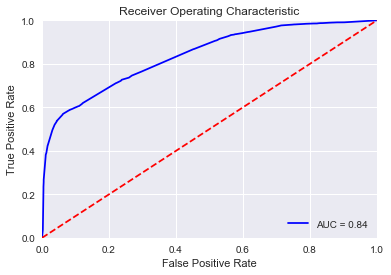

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, log_loss, accuracy_score

## Hyper-parameter tuning
import random
random.seed(10)
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3,4,5,6,7,8,9,10]}

Classifier = DecisionTreeClassifier(class_weight= {0:1, 1:9}, random_state = 1234)
model = GridSearchCV(Classifier, param_grid,cv = 5)
model.fit(X1_train, y1_train)
print(model.best_params_)

algorithm_func(DecisionTreeClassifier(max_depth = model.best_params_['max_depth'],
                                      class_weight= {0:1, 1:9},
                                      random_state = 0),
               X3_train,
               y3_train.values,
               X3_test,
               y3_test.values,
               0.2
              )

Train accuracy score: 0.6718133333333334
Test accuracy score: 0.6648
[[3398 3921]
 [ 269 4912]]
Error:  0.10030132327651306
auc: 0.8893872133455349


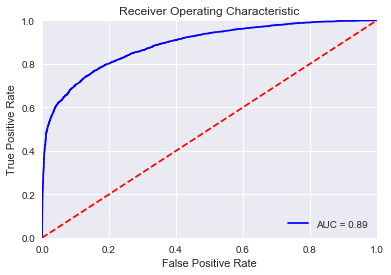

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

algorithm_func(GradientBoostingClassifier(max_depth = 10,
                                          max_features = 'sqrt' ,
                                          min_samples_leaf = 20,
                                          min_samples_split = 50,
                                          n_estimators = 32,
                                          learning_rate = 0.1,
                                          random_state = 0),
               X3_train,
               y3_train.values,
               X3_test,
               y3_test.values,
               0.2
              )

# gb_classifier = GradientBoostingClassifier(random_state= 0)
# gb_classifier.fit(X1_train, y1_train)
# pd.Series(gb_classifier.feature_importances_, index=X1_train.columns).sort_values(ascending=False)

In [186]:
df_train_new_X4 = df_train[X_3]
df_train_new_X4 = pd.get_dummies(df_train_new_X4)
df_train_new_X4.shape

from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(df_train_new_X4,
                                                        df_train['defective'],
                                                        stratify = df_train['defective'],
                                                        test_size = 0.15,
                                                        random_state = 0
                                                       )

X4_train.shape, X4_test.shape

((42500, 131), (7500, 131))

In [187]:
X4_train_1, X4_test_1, y4_train_1, y4_test_1 = train_test_split(X4_train,
                                                                y4_train.values,
                                                                stratify = y4_train.values,
                                                                test_size = 0.2,
                                                                random_state = 0
                                                       )

X4_train_1.shape, X4_test_1.shape

((34000, 131), (8500, 131))

In [72]:
# %%time
# n_estimators = [20, 25, 32, 35, 40]
# max_features = ['sqrt']
# max_depth = [5,8,10]
# min_samples_split = [40,50,60]
# min_samples_leaf = [10, 20, 30]
# learning_rate = [0.5, 0.25, 0.2, 0.1]

# param_grid = {'max_depth': max_depth,
#               'max_features': max_features,
#               'min_samples_leaf': min_samples_leaf,
#               'min_samples_split': min_samples_split,
#               'n_estimators': n_estimators,
#               'learning_rate': learning_rate
#              }
# Classifier = GradientBoostingClassifier(random_state = 0)

# grid_gb_model = GridSearchCV(Classifier, param_grid, cv = 3)
# grid_gb_model.fit(X3_train, y3_train)
# print(grid_gb_model.best_params_)

{'learning_rate': 0.25, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 40}
Wall time: 38min 48s


Train accuracy score: 0.6337352941176471
Test accuracy score: 0.6081176470588235
[[1716 3261]
 [  70 3453]]
Error:  0.0834038849499637
auc: 0.9037534623503142


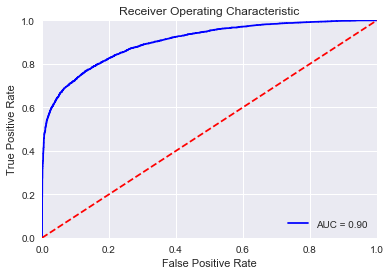

In [200]:
algorithm_func(GradientBoostingClassifier(max_depth = grid_gb_model.best_params_['max_depth'],
                                          max_features = grid_gb_model.best_params_['max_features'],
                                          min_samples_leaf = grid_gb_model.best_params_['min_samples_leaf'],
                                          min_samples_split = grid_gb_model.best_params_['min_samples_split'],
                                          n_estimators = grid_gb_model.best_params_['n_estimators'],
                                          learning_rate = grid_gb_model.best_params_['learning_rate'],
                                          random_state = 0
                                     ),
               X4_train_1,
               y4_train_1,
               X4_test_1,
               y4_test_1,
               0.1
              )

In [194]:
gb_classifier = GradientBoostingClassifier(max_depth = grid_gb_model.best_params_['max_depth'],
                                           max_features = grid_gb_model.best_params_['max_features'],
                                           min_samples_leaf = grid_gb_model.best_params_['min_samples_leaf'],
                                           min_samples_split = grid_gb_model.best_params_['min_samples_split'],
                                           n_estimators = grid_gb_model.best_params_['n_estimators'],
                                           learning_rate = grid_gb_model.best_params_['learning_rate'],
                                           random_state = 0
                                          )
gb_classifier.fit(X4_train_1,y4_train_1)

get_class = lambda x: 1 if x > 0.1 else 0
    
y_pred_train = pd.DataFrame(gb_classifier.predict_proba(X4_train_1),                                
                            columns = ['P0','P1'])

y_pred_train['Predicted'] = y_pred_train['P1'].apply(get_class)
y_pred_train['Actual'] = y4_train_1

cm_train = confusion_matrix(y_pred_train['Actual'], y_pred_train['Predicted'])

print('Train accuracy score:', accuracy_score(y4_train_1, y_pred_train['Predicted']))

######################################################################################

y_pred_test = pd.DataFrame(gb_classifier.predict_proba(X4_test),                                
                        columns = ['P0','P1'])

y_pred_test['Predicted'] = y_pred_test['P1'].apply(get_class)
y_pred_test['Actual'] = y4_test.values

print('Test accuracy score:', accuracy_score(y_pred_test['Actual'], y_pred_test['Predicted']))

cm_test = confusion_matrix(y_pred_test['Actual'], y_pred_test['Predicted'])
tn, fp, fn, tp = cm_test.ravel()

Error = 0.9*(fn/(fn + tp)) + 0.1*(fp/(fp + tn))

print('Error: ',Error)

Train accuracy score: 0.6337352941176471
Test accuracy score: 0.6126666666666667
Error:  0.0866945891179647


In [201]:
print(y_pred_test['Actual'].value_counts())
print(y_pred_test['Predicted'].value_counts())

0    4391
1    3109
Name: Actual, dtype: int64
1    5860
0    1640
Name: Predicted, dtype: int64


In [90]:
df_test_X3 = pd.get_dummies(df_test[X_3])
df_test_X3.columns

Index(['num_private', 'population', 'public_meeting', 'permit', 'wpt_name_kwa',
       'wpt_name_none', 'wpt_name_mzee', 'wpt_name_shuleni', 'wpt_name_shule',
       'wpt_name_school',
       ...
       'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
       'waterpoint_type_other', 'quarter_1', 'quarter_2', 'quarter_3',
       'quarter_4', 'cluster_2_0', 'cluster_2_1', 'cluster_2_2'],
      dtype='object', length=108)

In [96]:
a = list(X3_train.columns)
b = list(df_test_X3.columns)

for i in b:
    if i in a:
        a.remove(i)

print(a)

df_test_X3['scheme_management_None'] = 0
df_test_X3['extraction_type_other - mkulima/shinyanga'] = 0
df_test_X3['extraction_type_walimi'] = 0
df_test_X3.shape

['scheme_management_None', 'extraction_type_other - mkulima/shinyanga', 'extraction_type_walimi']


(5083, 111)

In [133]:
gb_classifier = GradientBoostingClassifier(max_depth = grid_gb_model.best_params_['max_depth'],
                                           max_features = grid_gb_model.best_params_['max_features'],
                                           min_samples_leaf = grid_gb_model.best_params_['min_samples_leaf'],
                                           min_samples_split = grid_gb_model.best_params_['min_samples_split'],
                                           n_estimators = grid_gb_model.best_params_['n_estimators'],
                                           learning_rate = grid_gb_model.best_params_['learning_rate'],
                                           random_state = 0
                                          )
gb_classifier.fit(X4_train_1,y4_train_1)

get_class = lambda x: 1 if x > 0.2 else 0
    
y_pred_train_new = pd.DataFrame(gb_classifier.predict_proba(X4_train_1),                                
                            columns = ['P0','P1'])

y_pred_train_new['Predicted'] = y_pred_train_new['P1'].apply(get_class)
y_pred_train_new['Actual'] = y4_train_1


y_pred_test_new = pd.DataFrame(gb_classifier.predict_proba(df_test_X3),                                
                        columns = ['P0','P1'])

y_pred_test_new['Predicted'] = y_pred_test_new['P1'].apply(get_class)


In [134]:
y_pred_test_new['Predicted'].value_counts()

1    2882
0    2201
Name: Predicted, dtype: int64

In [138]:
y_pred_test_new['defective'] = y_pred_test_new['Predicted'].apply(lambda x: 'yes' if x == 1 else 'no')
y_pred_test_new

P0        P1  Predicted defective
0     0.287398  0.712602          1       yes
1     0.706729  0.293271          1       yes
2     0.948312  0.051688          0        no
3     0.891440  0.108560          0        no
4     0.537069  0.462931          1       yes
5     0.901187  0.098813          0        no
6     0.849130  0.150870          0        no
7     0.866915  0.133085          0        no
8     0.795949  0.204051          1       yes
9     0.896341  0.103659          0        no
10    0.895794  0.104206          0        no
11    0.900503  0.099497          0        no
12    0.450267  0.549733          1       yes
13    0.885288  0.114712          0        no
14    0.937217  0.062783          0        no
15    0.951734  0.048266          0        no
16    0.771311  0.228689          1       yes
17    0.976380  0.023620          0        no
18    0.506504  0.493496          1       yes
19    0.387163  0.612837          1       yes
20    0.511753  0.488247          1       yes
21    0.652134  0.347866          1       yes
22    0.870252  0.129748          0        no
23    0.841684  0.158316          0        no
24    0.172045  0.827955          1       yes
25    0.046658  0.953342          1       yes
26    0.836304  0.163696          0        no
27    0.480731  0.519269          1       yes
28    0.872010  0.127990          0        no
29    0.540575  0.459425          1       yes
...        ...       ...        ...       ...
5053  0.111206  0.888794          1       yes
5054  0.003999  0.996001          1       yes
5055  0.886788  0.113212          0        no
5056  0.885934  0.114066          0        no
5057  0.106406  0.893594          1       yes
5058  0.433140  0.566860          1       yes
5059  0.885711  0.114289          0        no
5060  0.960845  0.039155          0        no
5061  0.762141  0.237859          1       yes
5062  0.893469  0.106531          0        no
5063  0.892933  0.107067          0        no
5064  0.928675  0.071325          0        no
5065  0.188546  0.811454          1       yes
5066  0.622123  0.377877          1       yes
5067  0.622123  0.377877          1       yes
5068  0.718118  0.281882          1       yes
5069  0.743629  0.256371          1       yes
5070  0.645957  0.354043          1       yes
5071  0.929473  0.070527          0        no
5072  0.057274  0.942726          1       yes
5073  0.561560  0.438440          1       yes
5074  0.090401  0.909599          1       yes
5075  0.348666  0.651334          1       yes
5076  0.387623  0.612377          1       yes
5077  0.730920  0.269080          1       yes
5078  0.851205  0.148795          0        no
5079  0.708669  0.291331          1       yes
5080  0.770615  0.229385          1       yes
5081  0.315648  0.684352          1       yes
5082  0.461682  0.538318          1       yes

[5083 rows x 4 columns]

In [139]:
y_pred_test_new['new_ids'] = df_test['new_ids']

In [141]:
y_pred_test_new = y_pred_test_new[['new_ids', 'defective']]
y_pred_test_new

new_ids defective
0        4168       yes
1       24074       yes
2       19227        no
3       44693        no
4       22751       yes
5       51896        no
6        8556        no
7       48413        no
8        5853       yes
9       36654        no
10      40398        no
11      49235        no
12      26676       yes
13      32770        no
14      58318        no
15      16559        no
16      12752       yes
17      49720        no
18       1650       yes
19      54359       yes
20      38776       yes
21      40094       yes
22      32680        no
23      45490        no
24      27470       yes
25      11918       yes
26      15619        no
27      13395       yes
28      46706        no
29        884       yes
...       ...       ...
5053    15882       yes
5054      377       yes
5055    32869        no
5056    19807        no
5057    27336       yes
5058    33341       yes
5059    46684        no
5060    56817        no
5061     3221       yes
5062    20588        no
5063    36173        no
5064    44304        no
5065    29520       yes
5066    38349       yes
5067    33406       yes
5068    11155       yes
5069    49246       yes
5070     5414       yes
5071    14859        no
5072     7489       yes
5073     5658       yes
5074    14776       yes
5075    11999       yes
5076    51052       yes
5077    25126       yes
5078    38463        no
5079    36374       yes
5080     5214       yes
5081    24248       yes
5082    56165       yes

[5083 rows x 2 columns]

In [142]:
submission_file = y_pred_test_new.to_csv('final_submission_file.csv')

In [202]:
import xgboost as xgb


Train accuracy score: 0.6195294117647059
Test accuracy score: 0.5982352941176471
[[1639 3338]
 [  77 3446]]
Error:  0.08673925033867116
auc: 0.9011298980704372


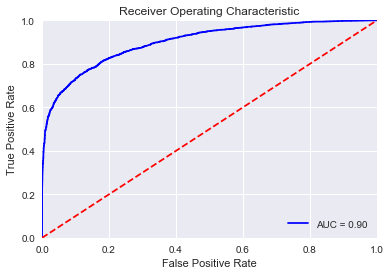

Wall time: 8min 13s


In [206]:
%%time
algorithm_func(xgb.XGBClassifier(learning_rate =0.01,
                                  n_estimators=5000,
                                  max_depth=4,
                                  min_child_weight=6,
                                  gamma=0,
                                  subsample=0.8,
                                  colsample_bytree=0.8,
                                  reg_alpha=0.005,
                                  objective= 'binary:logistic',
                                  nthread=4,
                                  scale_pos_weight=1,
                                  seed=27),
               X4_train_1,
               y4_train_1,
               X4_test_1,
               y4_test_1,
               0.1
              )